<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/1115_ob%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 (CNN)

## 01 합성곱 신경망

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


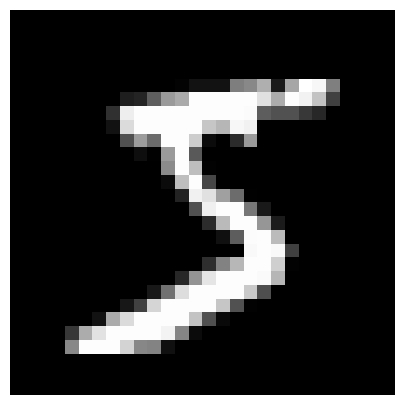

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train [..., tf.newaxis]
x_valid_in = x_valid [..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API 로 모델 생성 및 학습

합성곱 레이어 1개 풀링 레이어 1개 적용하는 간단 모델 생성

최종 분류기로 Dense 레이어 적용하기 위해, Flatten 층 추가해 1차원 배열로 펼친 후 합성곱은 conv2D 레이어, 사용 커널 크기 3x3 32종류, ReLU 활성화 함수 적용

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    # Max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.8799 - loss: 0.4261 - val_accuracy: 0.9729 - val_loss: 0.0964
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9745 - loss: 0.0902 - val_accuracy: 0.9773 - val_loss: 0.0697
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9804 - loss: 0.0641 - val_accuracy: 0.9801 - val_loss: 0.0607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9848 - loss: 0.0518 - val_accuracy: 0.9808 - val_loss: 0.0580
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9828 - val_loss: 0.0529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9899 - loss: 0.0370 - val_accuracy: 0.9807 - val_loss: 0.0583
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9914 - loss: 0.0307 - val_accuracy: 0.9815 - val_loss: 0.0568
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9912 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9787 - loss: 0.0722


[0.058598052710294724, 0.9829000234603882]

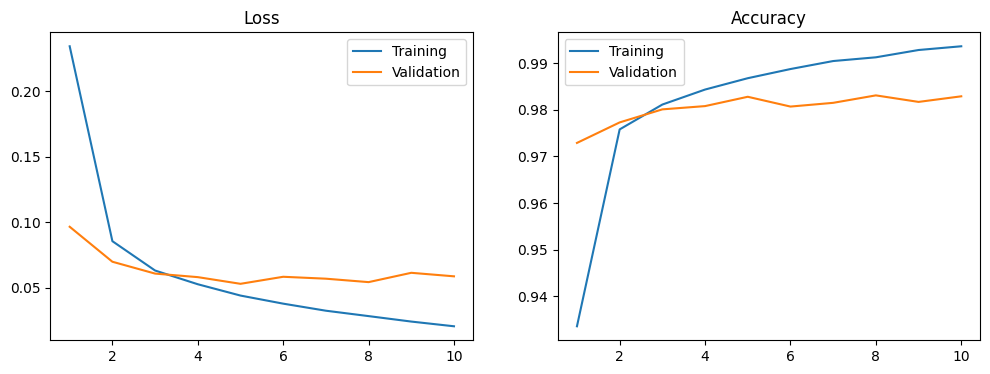

In [ ]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악

모델 인스턴스에 summary() 메소드 적용하면 모델 구조 요약해 보여줌

각 레이어 이름, 출력 텐서의 형태, 각 레이어를 구성하는 파라미터 개수 알 수 있음

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                        │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool (MaxPooling2D)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [ ]:
# 입력 텐서 형태
print(model.input)

# 출력 텐서 형태
print(model.output)

#레이어
print(model.layers)

# 첫번째 레이어 선택
print(model.layers[0])

# 첫 번째 레이어 입력
print(model.layers[0].input)

# 첫 번째 레이어 출력
print(model.layers[0].output)

# 첫 번째 레이어 가중치
print(model.layers[0].get_weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")
[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d872131b5e0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d8724907460>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7d87213621d0>, <keras.src.layers.core.dense.Dense object at 0x7d8721362470>]
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv/Relu:0', description="created by layer 'conv'")
<bound method Layer.get_weights of <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d87213

In [ ]:
# 첫번째 레이어 커널 가중치
print(model.layers[0].kernel)

# 첫번째 레이어 바이어스 가중치
print(model.layers[0].bias)

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.61709750e-01,  5.03580924e-03, -8.30147922e-01,
          -7.51731813e-01,  2.45160848e-01,  1.83330163e-01,
           1.99644819e-01, -8.26667845e-01,  2.97773689e-01,
          -2.33013868e-01, -3.94511670e-01, -4.89372879e-01,
           4.09456104e-01, -1.33991528e+00,  3.14469010e-01,
          -9.23044443e-01, -7.93233633e-01,  1.49156824e-01,
           3.95207316e-01, -7.48066843e-01, -1.81064099e-01,
          -4.99821931e-01,  1.60309196e-01,  4.07121241e-01,
          -5.72102904e-01, -1.01248376e-01,  3.58564913e-01,
           9.80767980e-02, -6.04740202e-01, -4.30777103e-01,
          -1.33166477e-01,  5.96893430e-02]],

        [[ 6.57090902e-01, -3.73975821e-02, -7.70603597e-01,
          -6.53598309e-01,  2.01916844e-01, -5.24362206e-01,
           2.71904111e-01, -1.94732979e-01,  1.00102173e-02,
          -1.30004987e-01, -6.25708759e-01, -1.27834991e-01,
           2.56818663e-02, -

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번쨰, 두번째 레이어)
activator = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 109ms/step


2

In [ ]:
# 첫번쨰 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

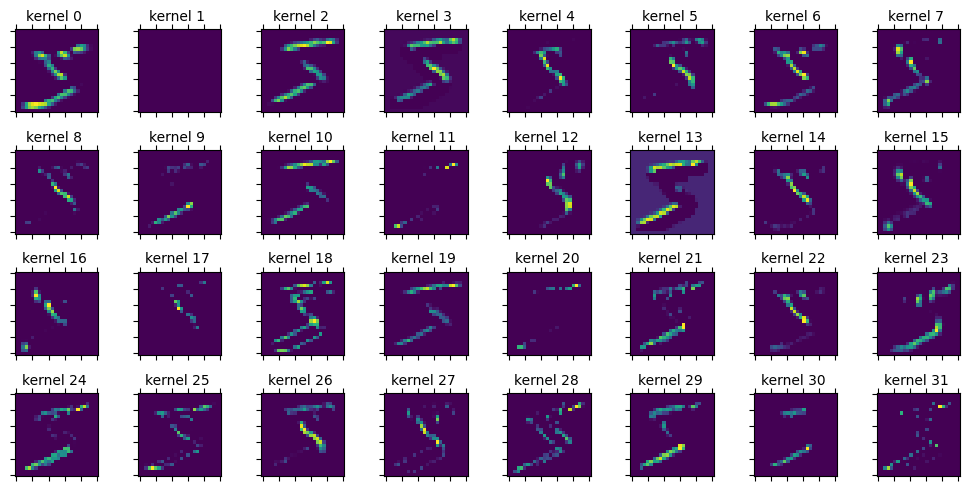

In [ ]:
# convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)
for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s '%str(i),fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

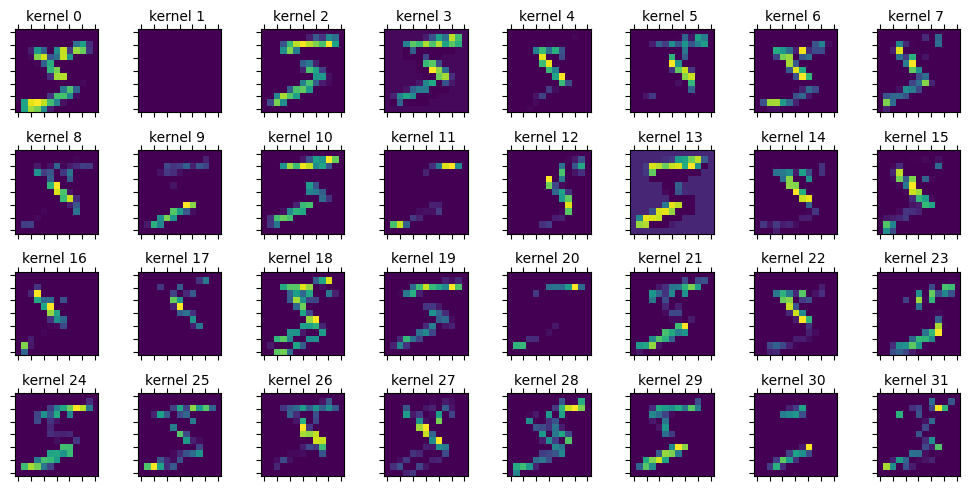

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s '%str(i),fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03 복잡한 모델 생성

레이어 기준 입력이나 출력이 2개 이상인 모델 생성\

### 3-1 데이터셋 준비

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

복잡한 구조 모델 가능, 다중 입력, 다중 출력 가능

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 32)     │            320 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 13, 13, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 5408)           │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 784)            │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6192)           │              0 │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10)             │         61,930 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 62,250 (243.16 KB)

 Trainable params: 62,250 (243.16 KB)

 Non-trainable params: 0 (0.00 B)

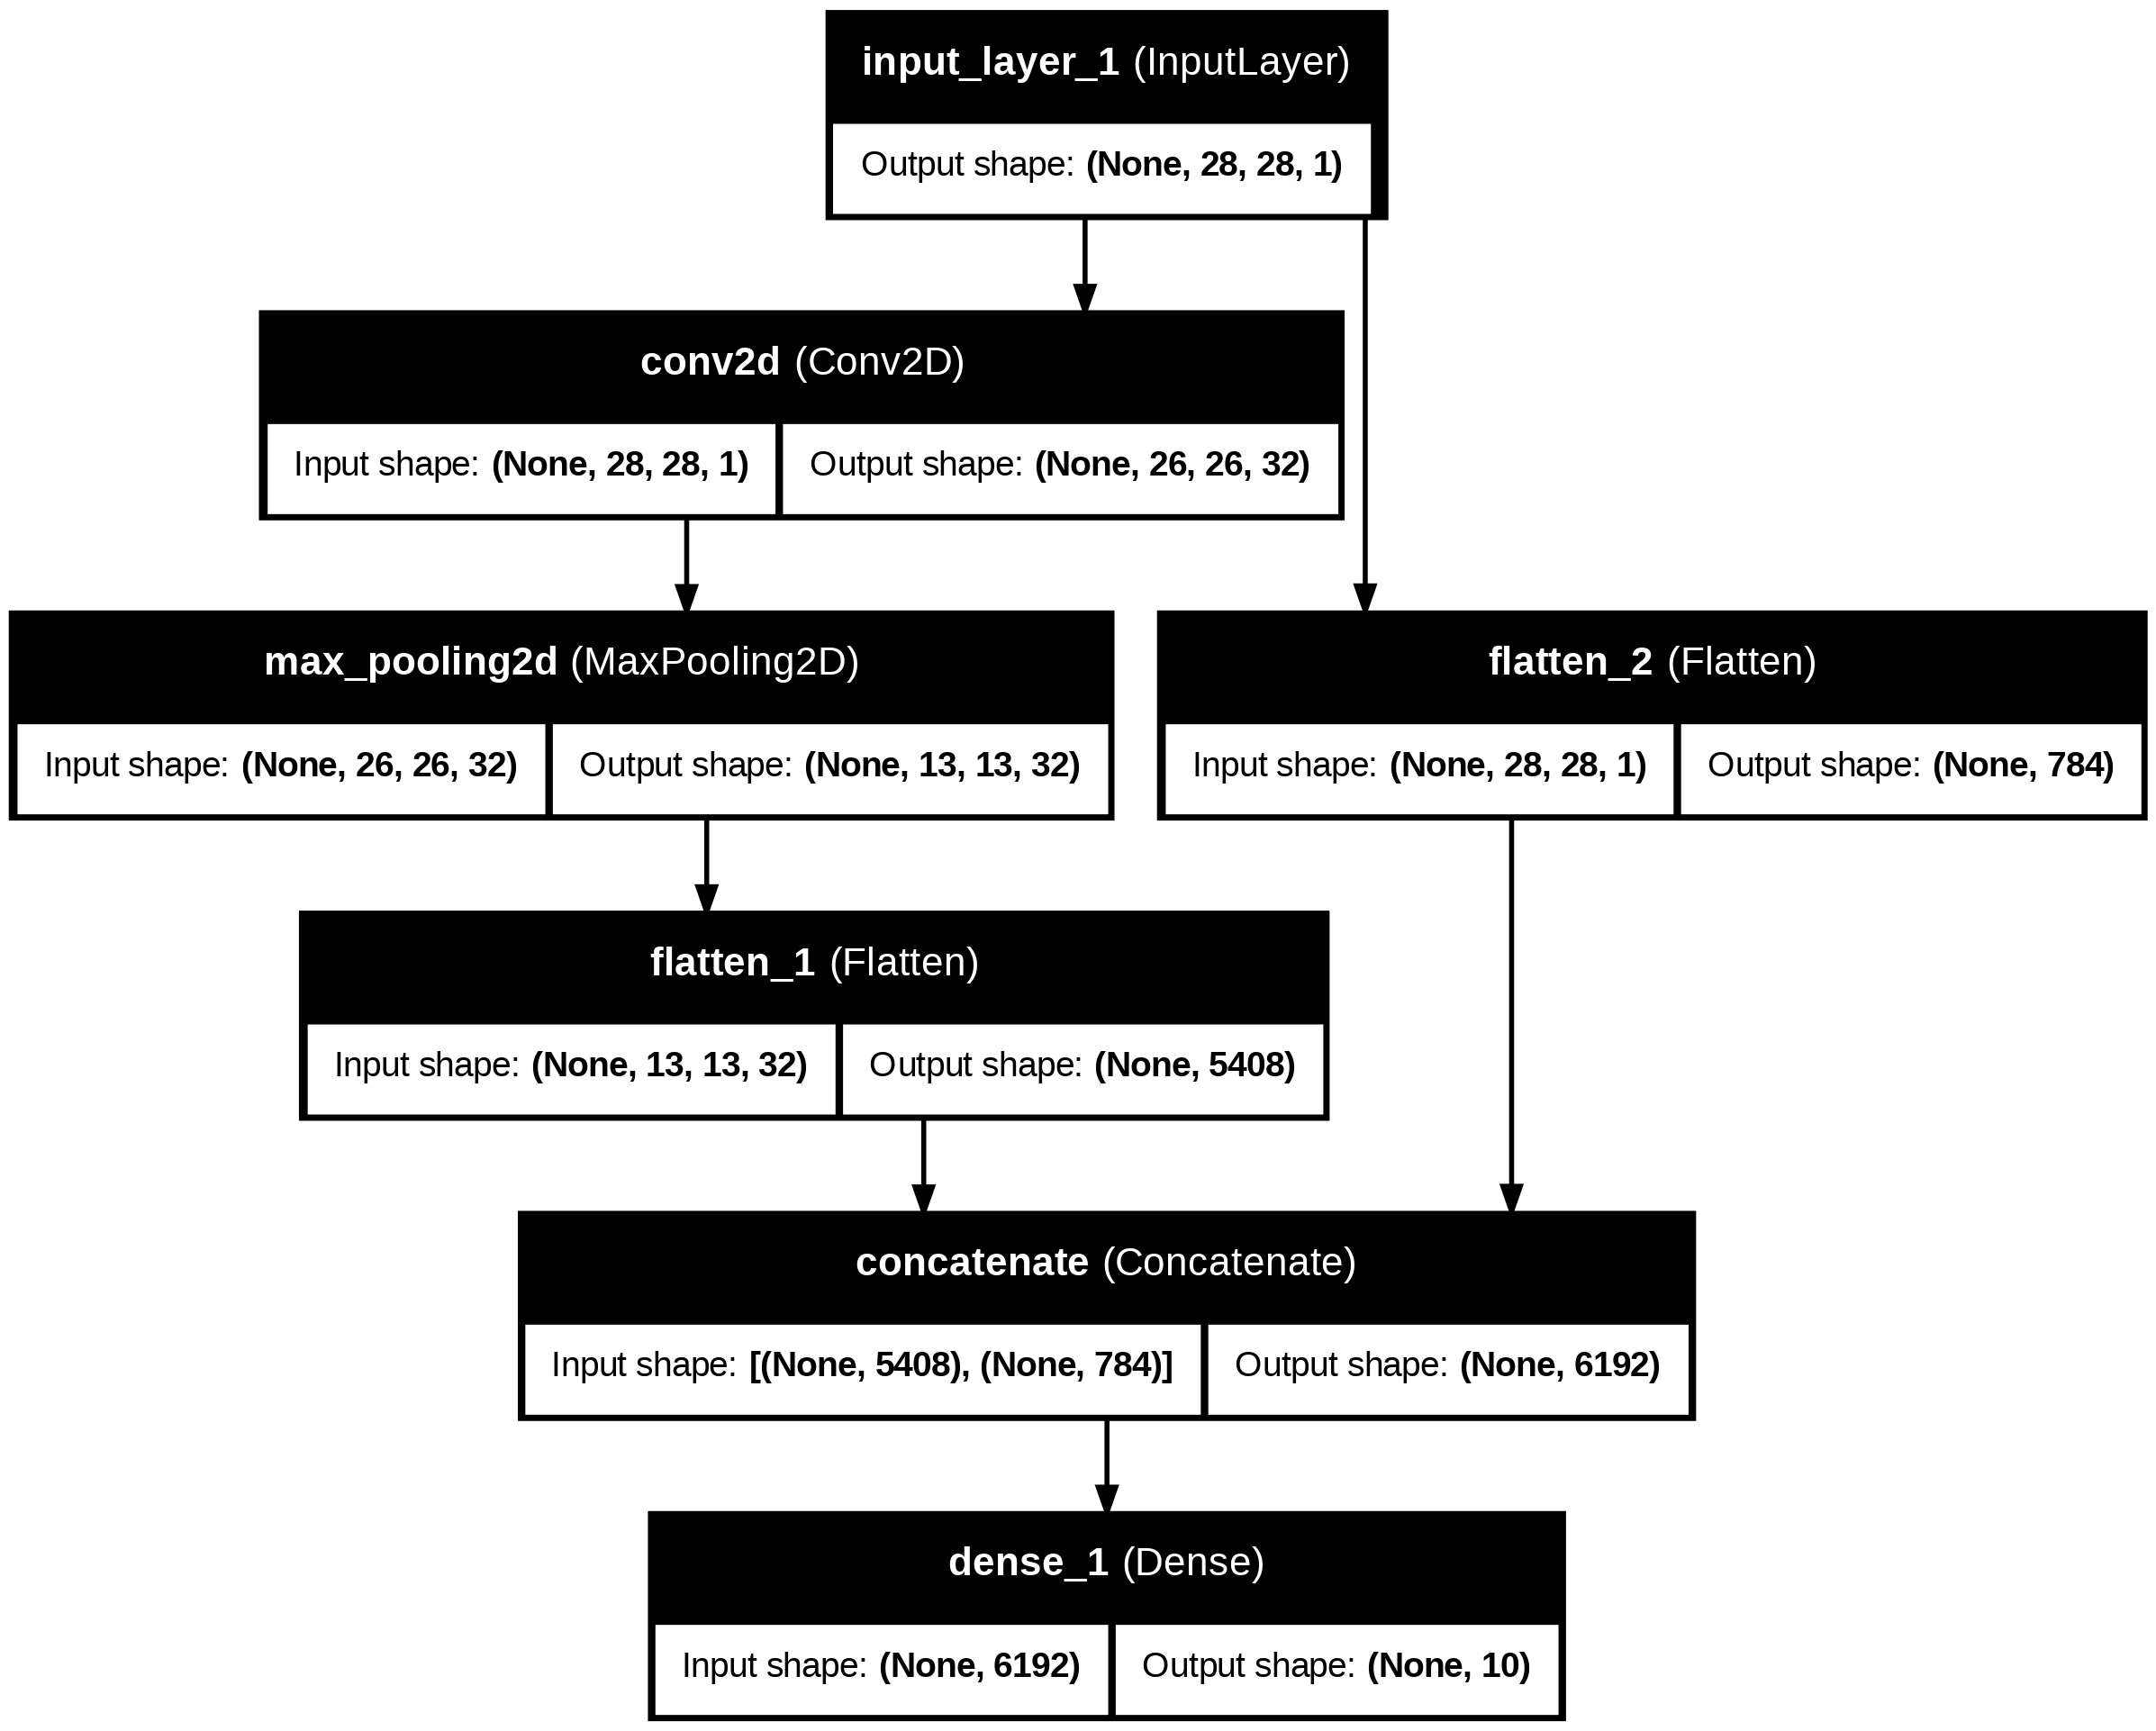

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8883 - loss: 0.3962 - val_accuracy: 0.9714 - val_loss: 0.0967
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9739 - loss: 0.0910 - val_accuracy: 0.9740 - val_loss: 0.0865
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9815 - loss: 0.0627 - val_accuracy: 0.9784 - val_loss: 0.0657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9856 - loss: 0.0483 - val_accuracy: 0.9778 - val_loss: 0.0656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9888 - loss: 0.0385 - val_accuracy: 0.9829 - val_loss: 0.0568
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9838 - val_loss: 0.0564
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9929 -

### 3-3 다중 출력 분류 모델

0~9까지 숫자를 맞추는 분류 문제, 홀짝 맞추는 분류 문제 동시에 풀어내는 모델 정의

최종 분류기의 출력 레이어 2개 만드는 것이 핵심

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_layer (Conv2D)     │ (None, 26, 26, 32)     │            320 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpool_layer             │ (None, 13, 13, 32)     │              0 │ conv2d_layer[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_layer (Flatten)   │ (None, 5408)           │              0 │ maxpool_layer[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 784)            │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 6192)           │              0 │ flatten_layer[0][0],   │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ digit_dense (Dense)       │ (None, 10)             │         61,930 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ odd_dense (Dense)         │ (None, 1)              │            785 │ flatten_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 63,035 (246.23 KB)

 Trainable params: 63,035 (246.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=inputs>
[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_17>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_18>]


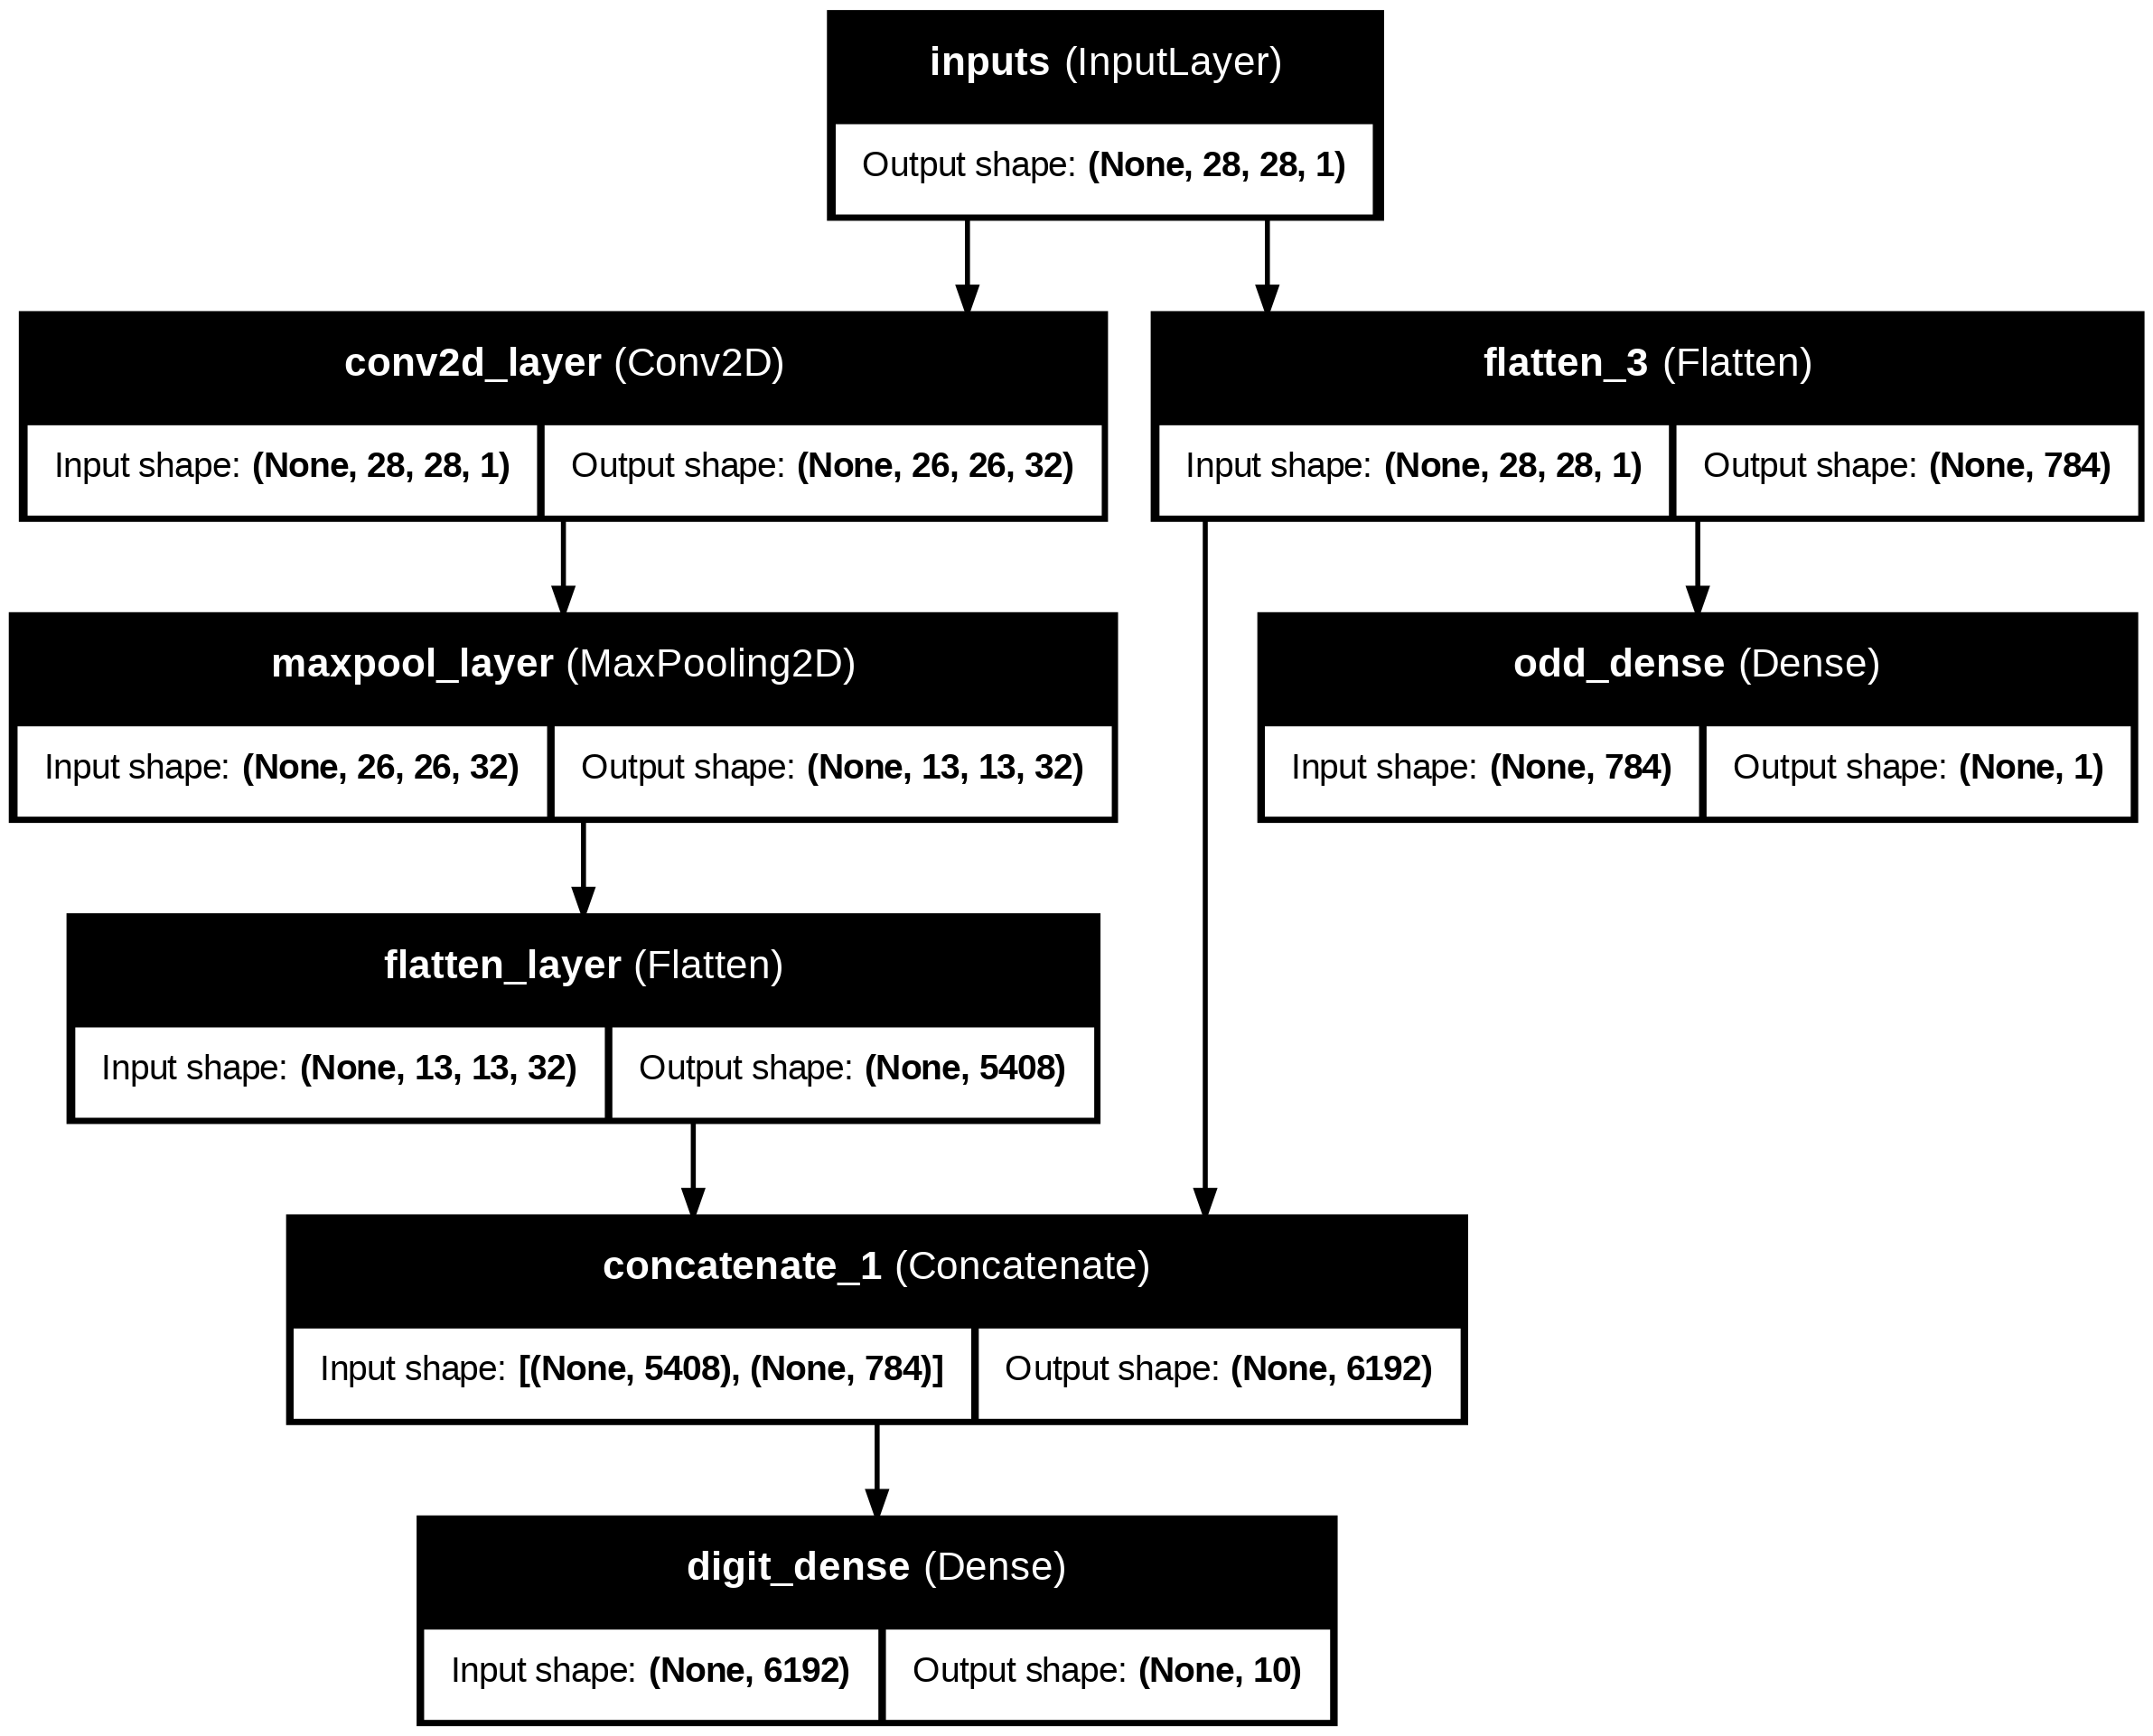

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss=1.0 * sparse_categorical_crossentropy +0.5 *binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3753 - digit_dense_loss: 0.2125 - odd_dense_loss: 0.3255 - digit_dense_accuracy: 0.9380 - odd_dense_accuracy: 0.8651 - val_loss: 0.2328 - val_digit_dense_loss: 0.0951 - val_odd_dense_loss: 0.2755 - val_digit_dense_accuracy: 0.9723 - val_odd_dense_accuracy: 0.8872
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2172 - digit_dense_loss: 0.0815 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9763 - odd_dense_accuracy: 0.8910 - val_loss: 0.2004 - val_digit_dense_loss: 0.0685 - val_odd_dense_loss: 0.2637 - val_digit_dense_accuracy: 0.9791 - val_odd_dense_accuracy: 0.8976
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1918 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8958 - val_loss: 0.1978 - val_digit_dense_loss: 0.0683 - val_odd_dense_loss: 0.2589 - val_digit_dense_accuracy: 0.9787 -

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1871 - digit_dense_loss: 0.0592 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9837 - odd_dense_accuracy: 0.9002


[0.1870926171541214,
 0.05924044921994209,
 0.2557043135166168,
 0.9836999773979187,
 0.9002000093460083]

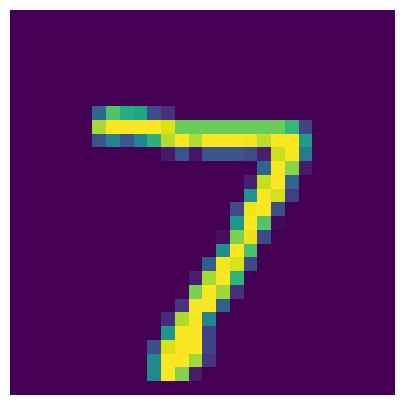

In [ ]:
#검증 데이터셋의 인덱스0에 해당하는 이미지 출력
#샘플이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])


313/313 [==============================] - 1s 4ms/step
[4.3355415e-14 3.5640810e-11 8.7875076e-09 3.7184952e-07 5.9215453e-13
 8.3407689e-13 6.5649488e-21 9.9999958e-01 6.9341394e-10 8.4579579e-09]
[0.99965805]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
print(digit_labels[0:10])

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
print(odd_labels[0:10])

[1 0 1 0 0 1 0 1 0 1]


### 3-4 전이 학습(Transfer Learning)

앞서 훈련한 모델의 일부를 가져와서 그대로 사용, 최종 출력층만 새롭게 추가해 모델 재구성, 기존 학습된 모델을 활용해 새로운 모델 만들어내는 개념

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

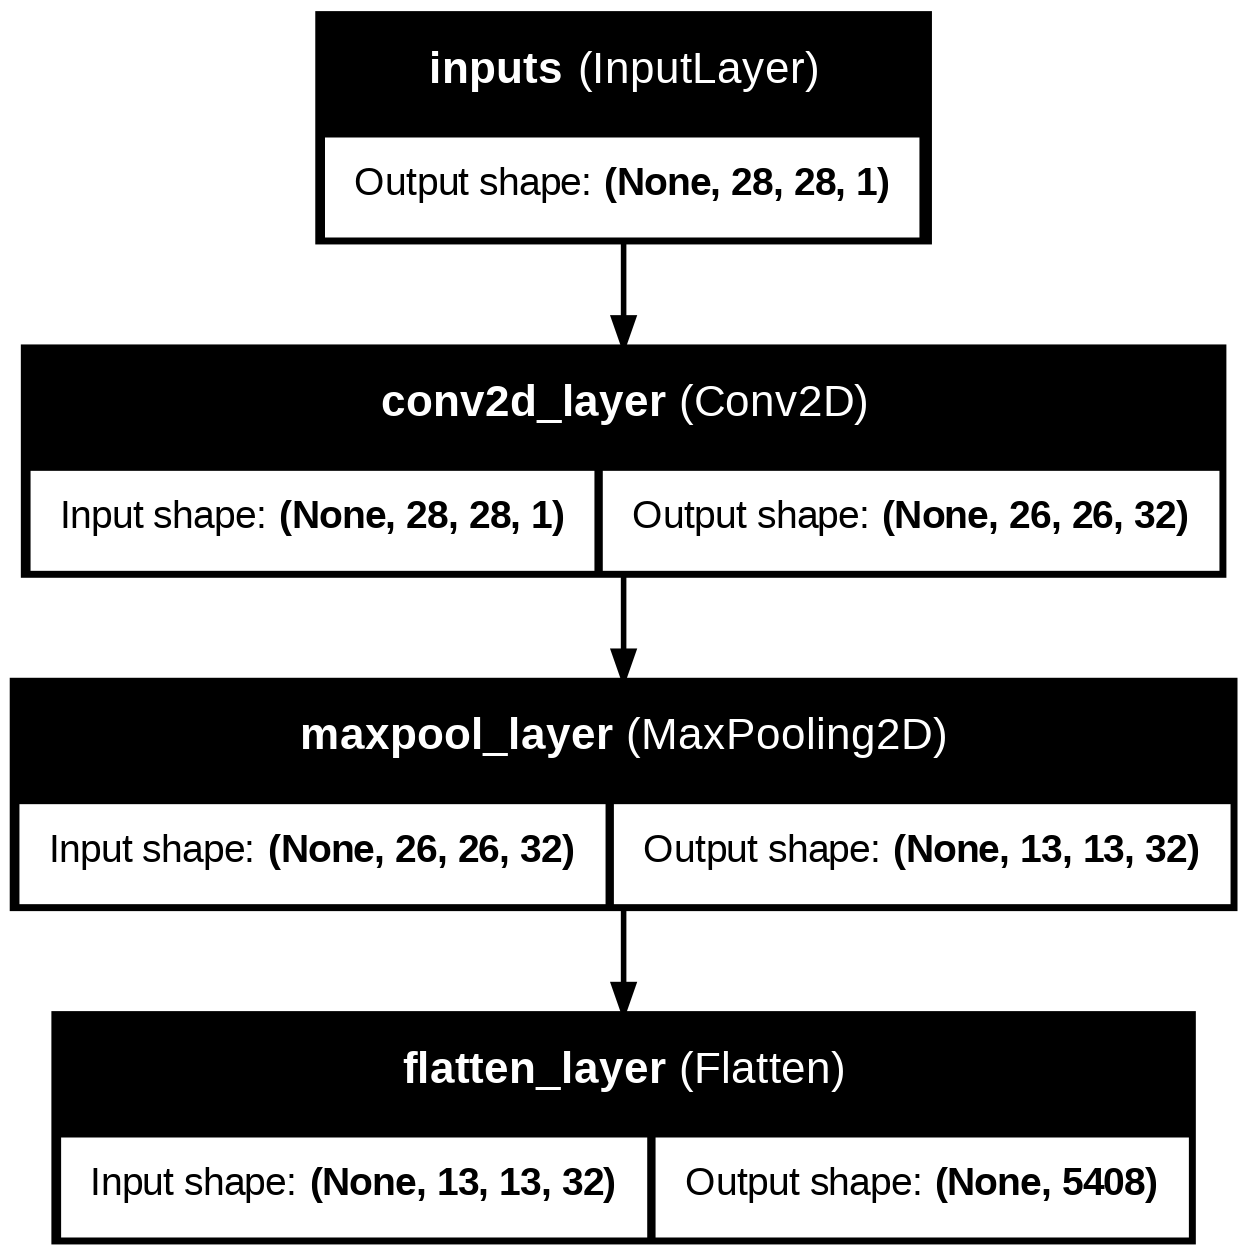

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ base (Functional)                    │ (None, 5408)                │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

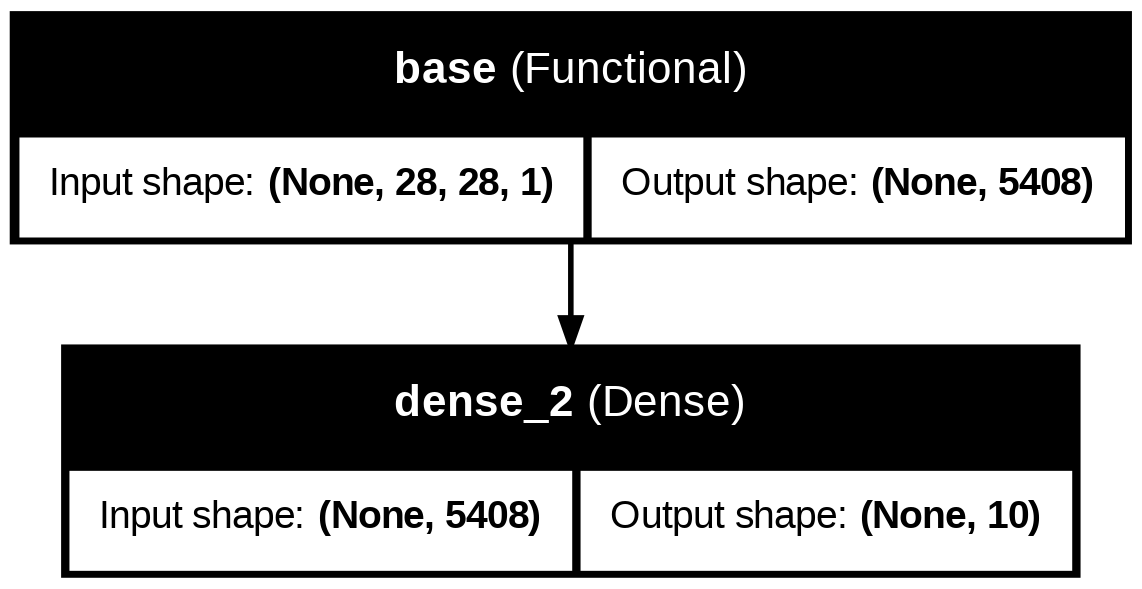

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
history = digit_model.fit(x_train_in, y_train, epochs=10, validation_data=(x_valid_in, y_valid))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1340 - accuracy: 0.9627 - val_loss: 0.0672 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0457 - accuracy: 0.9864 - val_loss: 0.0532 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0625 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0492 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0553 -

In [ ]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,090 (211.29 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8690 - loss: 0.5894 - val_accuracy: 0.9535 - val_loss: 0.1856
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9529 - loss: 0.1752 - val_accuracy: 0.9648 - val_loss: 0.1346
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9652 - loss: 0.1327 - val_accuracy: 0.9715 - val_loss: 0.1120
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9730 - loss: 0.1068 - val_accuracy: 0.9739 - val_loss: 0.0976
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9762 - loss: 0.0922 - val_accuracy: 0.9758 - val_loss: 0.0893
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9804 - loss: 0.0759 - val_accuracy: 0.9773 - val_loss: 0.0819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9817 - loss: 0.0734 - val_accuracy: 0.9789 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9833 - loss: 0

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,090 (211.29 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8640 - loss: 0.6020 - val_accuracy: 0.9499 - val_loss: 0.1876
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9534 - loss: 0.1759 - val_accuracy: 0.9633 - val_loss: 0.1362
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9662 - loss: 0.1304 - val_accuracy: 0.9695 - val_loss: 0.1127
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9728 - loss: 0.1070 - val_accuracy: 0.9745 - val_loss: 0.0986
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9774 - loss: 0.0907 - val_accuracy: 0.9780 - val_loss: 0.0865
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9787 - loss: 0.0791 - val_accuracy: 0.9774 - val_loss: 0.0827
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9806 - loss: 0.0738 - val_accuracy: 0.9780 - val_loss: 0.0776
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9830 - loss: 0